In [17]:
!pip install gdown
!pip install matplotlib
!pip install tensorflow
!pip install pandas
!pip install numpy

In [18]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import zipfile
import gdown
import matplotlib.image as mpimg

In [ ]:
# List of file IDs (from google drive that stores our dataset)
file_ids = [
    '1zNHqd0F-Y3tFuzPDf5KYg1QwQfq_Is8P',
    '1qdo1P-FaShwrf8uAtVganaOK1jPpproM',
]

# Folder to store downloaded ZIP files
zip_folder = 'zip_files'
os.makedirs(zip_folder, exist_ok=True)

# Folder to extract all ZIP files
extract_to = 'extracted_images'
os.makedirs(extract_to, exist_ok=True)

# download and extract all ZIP files from our google drive
for i, file_id in enumerate(file_ids, 1):
    zip_path = os.path.join(zip_folder, f'file_{i}.zip') # each ZIP file will be stored as file_#.zip

    # downloading file from google drive
    gdown.download(f'https://drive.google.com/uc?id={file_id}', zip_path, quiet=False)

    # Extract the downloaded ZIP file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

print(f"Done, stored in {extract_to}")

Downloading...
From: https://drive.google.com/uc?id=1zNHqd0F-Y3tFuzPDf5KYg1QwQfq_Is8P
To: /Users/jacob/Downloads/zip_files/file_1.zip
100%|████████████████████████████████████████| 922k/922k [00:00<00:00, 19.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1qdo1P-FaShwrf8uAtVganaOK1jPpproM
From (redirected): https://drive.google.com/uc?id=1qdo1P-FaShwrf8uAtVganaOK1jPpproM&confirm=t&uuid=15323adf-dedc-4de1-8f38-c0729afacae7
To: /Users/jacob/Downloads/zip_files/file_2.zip
100%|██████████████████████████████████████| 72.2M/72.2M [00:04<00:00, 15.8MB/s]


Done, stored in extracted_images


In [ ]:
main_folder = extract_to

image_extensions = {'.jpg', '.jpeg', '.png'}

In [ ]:
path = 'extracted_images/S5E04'
classes = os.listdir(path)
classes

['.DS_Store', 'Without_Peter', 'With_Peter']

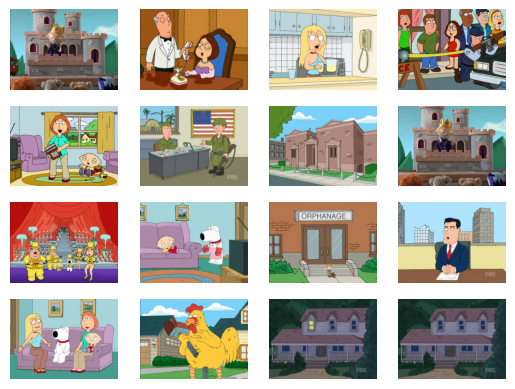

In [19]:
fig = plt.gcf()

with_dir = os.path.join('./All_Data/With_Peter_All')
without_dir = os.path.join('./All_Data/Without_Peter_All')
with_names = os.listdir(with_dir)
without_names = os.listdir(without_dir)

pic_index = 100

with_images = [os.path.join(with_dir, fname)
              for fname in with_dir[pic_index-16:pic_index]]
without_images = [os.path.join(without_dir, fname)
              for fname in without_names[pic_index-16:pic_index]]

for i, img_path in enumerate(with_images + without_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [20]:
base_dir = './All_Data'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(320,240),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(320,240),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)

Found 12768 files belonging to 2 classes.
Using 11492 files for training.
Found 12768 files belonging to 2 classes.
Using 1276 files for validation.


In [21]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(320, 240, 3))
base_model.trainable = False

model = tf.keras.models.Sequential([
    base_model,
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

In [22]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 10, 8, 2048)    │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 4, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 40960)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    20,972,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,091,713 (172.01 MB)

 Trainable params: 21,500,929 (82.02 MB)

 Non-trainable params: 23,590,784 (89.99 MB)

In [23]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [24]:
history = model.fit(train_datagen,
          epochs=10,
          validation_data=test_datagen)

Epoch 1/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 560s 2s/step - accuracy: 0.8902 - loss: 0.2847 - val_accuracy: 0.9632 - val_loss: 0.1029
Epoch 2/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 596s 2s/step - accuracy: 0.9799 - loss: 0.0578 - val_accuracy: 0.9632 - val_loss: 0.1098
Epoch 3/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 912s 3s/step - accuracy: 0.9880 - loss: 0.0349 - val_accuracy: 0.9710 - val_loss: 0.1222
Epoch 4/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 742s 2s/step - accuracy: 0.9891 - loss: 0.0338 - val_accuracy: 0.9679 - val_loss: 0.1291
Epoch 5/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 656s 2s/step - accuracy: 0.9927 - loss: 0.0266 - val_accuracy: 0.9749 - val_loss: 0.0981
Epoch 6/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 2925s 8s/step - accuracy: 0.9949 - loss: 0.0196 - val_accuracy: 0.9702 - val_loss: 0.1147
Epoch 7/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 2982s 8s/step - accuracy: 0.9938 - loss: 0.0169 - val_accuracy: 0.9741 - val_loss: 0.0994
Epoch 8/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 3854s 11s/step - accuracy: 0.9910 - loss: 0.0278 - val_

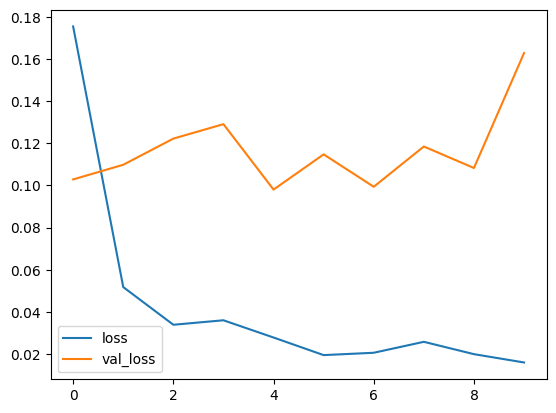

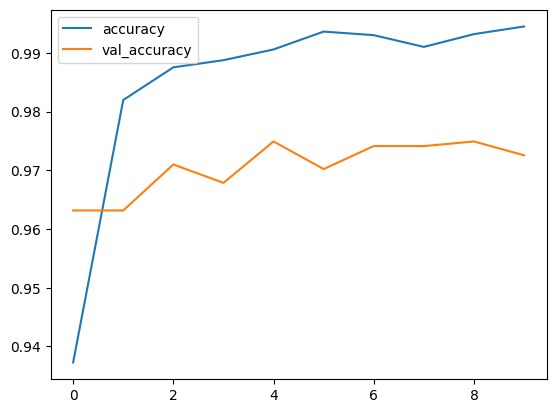

In [25]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Without Peter
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Without Peter
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
With Peter
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
With Peter
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Without Peter


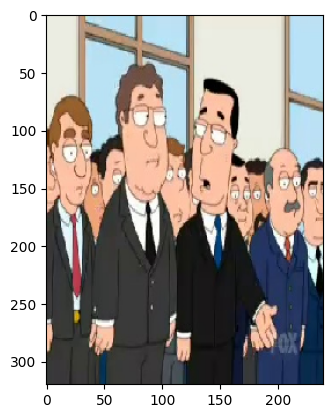

In [ ]:
from keras.preprocessing import image
image_paths = ['extracted_images/S5E04/Without_Peter/S5E04_500.jpg',
               'extracted_images/S5E04/Without_Peter/S5E04_1000.jpg',
               'extracted_images/S5E04/With_Peter/S5E04_1500.jpg',
               'extracted_images/S5E04/With_Peter/S5E04_2000.jpg',
               'extracted_images/S5E04/Without_Peter/S5E04_2683.jpg']
#Input image
for i in range(len(image_paths)):
    test_image = image.load_img(image_paths[i],target_size=(320,240))

    #For show image
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image,axis=0)

    # Result array
    result = model.predict(test_image)

    #Mapping result array with the main name list
    i=0
    if(result<=0.5):
      print("With Peter")
    else:
      print("Without Peter")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
With Peter


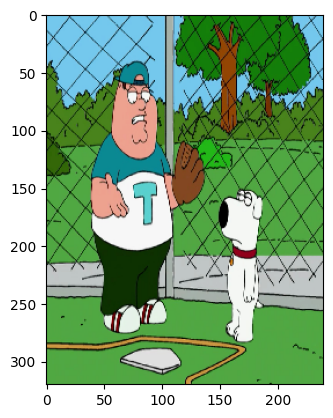

In [ ]:
test_image = image.load_img('extracted_images/initial model test/S1E05_500.jpg',target_size=(320,240))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result<=0.5):
  print("With Peter")
else:
  print("Without Peter")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Without Peter


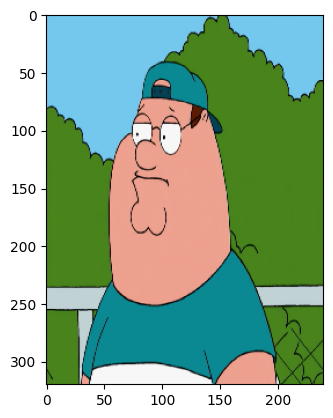

In [ ]:
test_image = image.load_img('extracted_images/initial model test/S1E05_1000.jpg',target_size=(320,240))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result<=0.5):
  print("With Peter")
else:
  print("Without Peter")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Without Peter


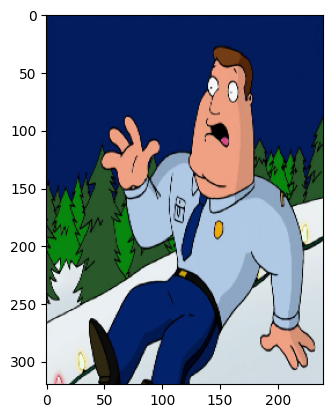

In [ ]:
test_image = image.load_img('extracted_images/initial model test/S1E05_1500.jpg',target_size=(320,240))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result<=0.5):
  print("With Peter")
else:
  print("Without Peter")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Without Peter


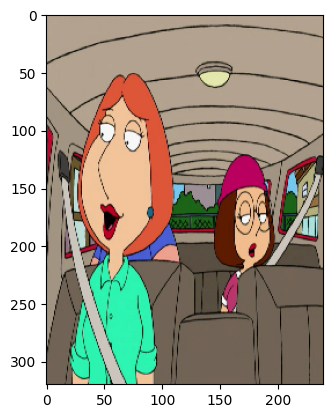

In [ ]:
test_image = image.load_img('extracted_images/initial model test/S1E05_2000.jpg',target_size=(320,240))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result<=0.5):
  print("With Peter")
else:
  print("Without Peter")